<a href="https://colab.research.google.com/github/disha2sinha/Movie-Recommendation-System/blob/master/Popularity_Based_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES:**

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
movies_data = pd.read_csv('https://raw.githubusercontent.com/disha2sinha/Movie-Recommendation-System/master/Revised%20Datasets/MoviesData.csv?token=AKDEMFJGJGYK3CWGGTMI3CLABWC5M',engine='python',index_col=0)
movies_data.head()

,tmdbId,title,release_year,release_day,genres,original_language,runtime,content,production_companies,budget,revenue,production_countries,status,popularity,vote_average,vote_count,keywords,cast,director,rating_count,mean_rating
index,,,,,,,,,,,,,,,,,,,,,
0,119450,Dawn of the Planet of the Apes,2014,Thursday,Science Fiction|Action|Drama|Thriller,English,130.0,A group of scientists in San Francisco struggl...,Ingenious Media|Chernin Entertainment|TSG Ente...,170000000,7.106446e+08,United States of America,Released,75.385211,7.3,4511.0,"['leader', 'colony', 'post-apocalyptic', 'dyst...",Andy Serkis|Jason Clarke|Gary Oldman|Keri Russ...,Matt Reeves,341.0,4.054252
1,2124,Color of Night,1994,Friday,Drama|Mystery|Romance|Thriller,English,121.0,When New York psychiatrist Bill Capa visits Lo...,Hollywood Pictures|Cinergi Pictures Entertainment,40000000,1.972605e+07,United States of America,Released,14.228963,5.4,117.0,"['suicide', 'california', 'sex', 'secret ident...",Bruce Willis|Jane March|Rubén Blades|Lesley An...,Richard Rush,324.0,4.256173
2,75656,Now You See Me,2013,Wednesday,Thriller|Crime,English,115.0,An FBI agent and an Interpol detective track a...,Summit Entertainment|K/O Paper Products|SOIXAN...,75000000,1.176989e+08,United States of America|France,Released,17.852022,7.3,5635.0,"['paris', 'bank', 'secret', 'fbi', 'vault', 'm...",Jesse Eisenberg|Mark Ruffalo|Woody Harrelson|M...,Louis Leterrier,311.0,4.487138
3,567,Rear Window,1954,Sunday,Drama|Mystery|Thriller,English,112.0,"Professional photographer L.B. ""Jeff"" Jeffries...",Paramount Pictures,1000000,3.676431e+07,United States of America,Released,17.911314,8.2,1531.0,"['nurse', 'photographer', 'suspicion of murder...",James Stewart|Grace Kelly|Wendell Corey|Thelma...,Alfred Hitchcock,304.0,4.138158
4,24428,The Avengers,2012,Wednesday,Science Fiction|Action|Adventure,English,143.0,When an unexpected enemy emerges and threatens...,Paramount Pictures|Marvel Studios,220000000,1.519558e+09,United States of America,Released,89.887648,7.4,12000.0,"['new york', 'shield', 'marvel comic', 'superh...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,291.0,4.221649


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9081 entries, 0 to 9217
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   release_year          9081 non-null   int64  
 3   release_day           9081 non-null   object 
 4   genres                9046 non-null   object 
 5   original_language     9079 non-null   object 
 6   runtime               9081 non-null   float64
 7   content               9069 non-null   object 
 8   production_companies  8417 non-null   object 
 9   budget                9081 non-null   int64  
 10  revenue               9081 non-null   float64
 11  production_countries  8787 non-null   object 
 12  status                9081 non-null   object 
 13  popularity            9081 non-null   float64
 14  vote_average          9081 non-null   float64
 15  vote_count           

# **POPULARITY BASED RECOMMENDATION SYSTEM :**

In [ ]:
movies_data[['vote_count','vote_average','rating_count','mean_rating','popularity']].describe()

,vote_count,vote_average,rating_count,mean_rating,popularity
count,9081.000000,9081.000000,9081.000000,9081.000000,9081.000000
mean,438.957384,6.362163,6.280476,0.788264,7.268057
std,996.171502,1.038804,22.874443,1.484708,9.372508
min,0.000000,0.000000,0.000000,0.000000,0.000004
25%,29.000000,5.800000,0.000000,0.000000,2.954184
50%,96.000000,6.500000,0.000000,0.000000,6.417420
75%,365.000000,7.000000,0.000000,0.000000,9.861672
max,14075.000000,10.000000,341.000000,5.000000,547.488298


**WEIGHTED AVERAGE FOR EACH MOVIES AVERAGE RATINGS :**

Weighted votes: 
>              W =   Rv + Cm
>                   ---------
                     v+m

R= average rating for the movie as a number from 0 to 10

v= number of votes for the movie

m= minimum votes required to be listed in Top(here 2000)

C=the mean vote across whole report


In [ ]:
R=movies_data['vote_average']
v=movies_data['vote_count']
C=movies_data['vote_average'].mean()
m=2000

In [ ]:
movies_data['weighted_votes']=(R*v+C*m)/(v+m)
movies_data[['title','weighted_votes']].sort_values('weighted_votes',ascending=False).head(20)

,title,weighted_votes
index,,
6678,The Shawshank Redemption,8.087210
6680,The Dark Knight,8.028385
168,Fight Club,7.968122
6676,The Godfather,7.967139
6681,Pulp Fiction,7.936769
423,Inception,7.883784
93,Forrest Gump,7.837758
6660,Interstellar,7.836432
1621,The Lord of the Rings: The Return of the King,7.760114


Weighted Ratings: 
>              W =   R1v1 + C1m1
>                     ---------
                      v1+m1

R1= average rating given to the movie as a number from 0 to 5 (obtained from the ratings_small.csv)

v1= number of users who rated for the movie as available in the ratings_small.csv

m1= minimum ratings required to be listed in Top(here 38)

C1=the mean ratings across whole report


In [ ]:
R1=movies_data['mean_rating']
v1=movies_data['rating_count']
C1=movies_data['mean_rating'].mean()
m1=movies_data['rating_count'].quantile(0.95)
m1

38.0

In [ ]:
movies_data['weighted_ratings']=(R1*v1+C1*m1)/(v1+m1)
movies_data[['title','weighted_ratings']].sort_values('weighted_ratings',ascending=False).head(20)

,title,weighted_ratings
index,,
2,Now You See Me,4.084396
26,9,3.896866
1,Color of Night,3.892138
8,Pitch Perfect 2,3.829624
4,The Avengers,3.825088
22,Cinderella,3.801063
3,Rear Window,3.765947
13,The Judge,3.753641
10,Sense and Sensibility,3.751669


**ASSIGNING SCORES TO THE MOVIES BY GIVING 45% IMPORTANCE TO WEIGHTED AVERAGE OF VOTES + 45% IMPORTANCE TO POPULARITY + 10% TO WEIGHTED AVERAGE OF RATINGS**

In [ ]:
scaler=MinMaxScaler()
movies_data[['weighted_votes','weighted_ratings','popularity']]=scaler.fit_transform(movies_data[['weighted_votes','weighted_ratings','popularity']])
movies_data['score']=movies_data['weighted_votes']*0.45 + movies_data['weighted_ratings']*0.1+movies_data['popularity']*0.45
movies_data[['title','weighted_votes','weighted_ratings','popularity','score']].sort_values('score',ascending=False).head(10)

,title,weighted_votes,weighted_ratings,popularity,score
index,,,,,
2694,Minions,0.388873,0.002237,1.000000,0.625217
168,Fight Club,0.957150,0.715931,0.116659,0.554807
6680,The Dark Knight,0.978834,0.002237,0.224968,0.541935
6681,Pulp Fiction,0.945869,0.002237,0.257449,0.541717
15,Whiplash,0.857851,0.892269,0.117445,0.528110
7388,Big Hero 6,0.771829,0.002237,0.390602,0.523318
661,Gone Girl,0.794702,0.309699,0.282748,0.515822
93,Forrest Gump,0.910244,0.663895,0.088234,0.515705
60,Star Wars,0.862133,0.733393,0.076987,0.495943


**ONLY MOVIES HAVING SCORE ABOVE A THRESHOLD VALUE CONSIDERED POPULAR :**

In [ ]:
movies_data.score.describe()

count    9081.000000
mean        0.187960
std         0.039238
min         0.014399
25%         0.171799
50%         0.176159
75%         0.189428
max         0.625217
Name: score, dtype: float64

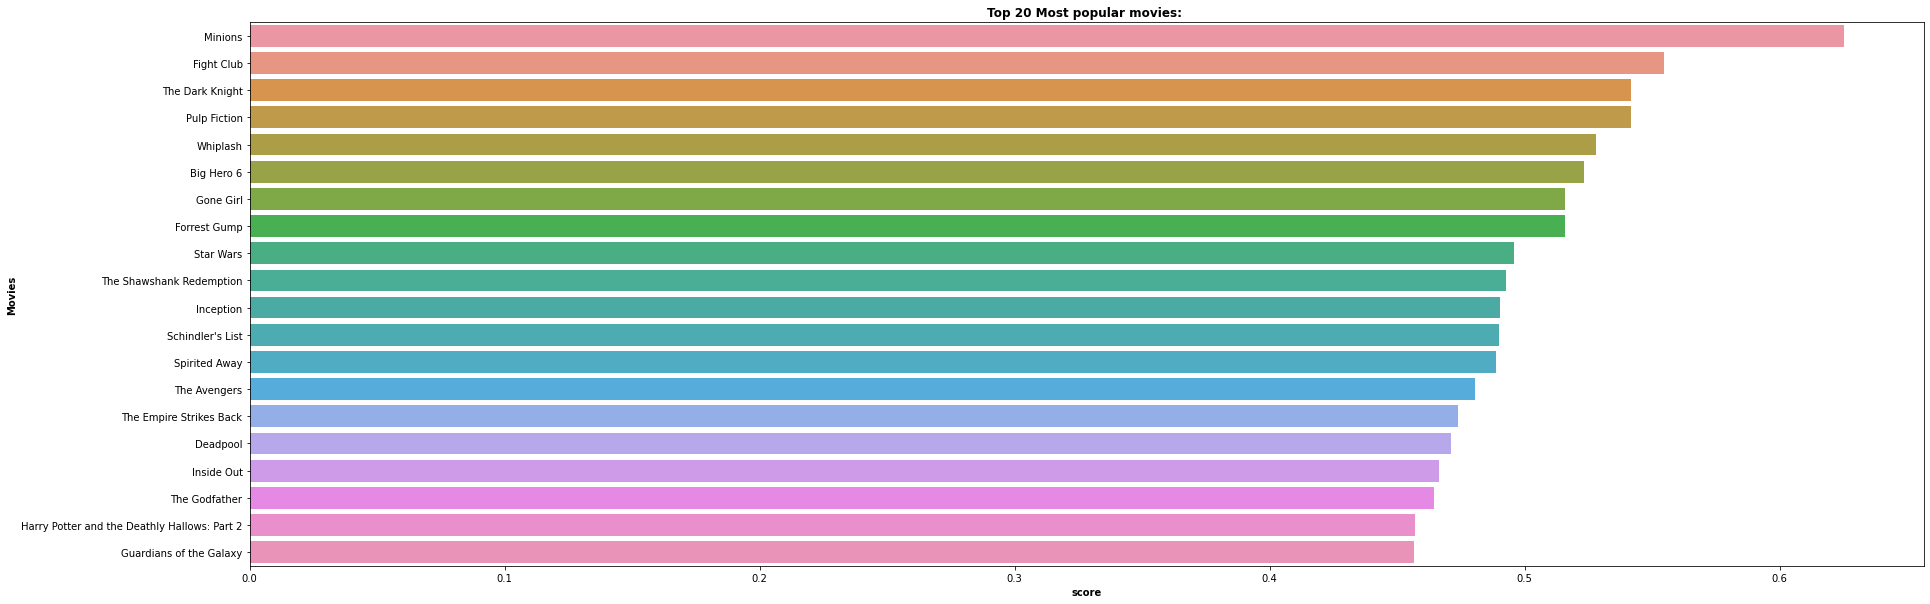

In [ ]:
movies_data['profit']=movies_data['revenue']-movies_data['budget']
popular_movies=movies_data[['tmdbId','title','budget','profit','score','release_year','release_day','keywords','genres','production_countries','production_companies','original_language','runtime','content','status','cast','director']].sort_values('score',ascending=False).reset_index(drop=True)
plt.figure(figsize=(30,10))
axis=sns.barplot(x=popular_movies['score'].head(20),y=popular_movies['title'].head(20))
plt.title('Top 20 Most popular movies: ',weight='bold')
plt.xlabel('score',weight='bold')
plt.ylabel('Movies',weight='bold')
plt.savefig('PopularMovies.jpg')

In [ ]:
popular_movies.shape

(9081, 17)

In [ ]:
popular_movies[['title','genres','score']].head(20)

,title,genres,score
0,Minions,Family|Animation|Adventure|Comedy,0.625217
1,Fight Club,Drama,0.554807
2,The Dark Knight,Drama|Action|Crime|Thriller,0.541935
3,Pulp Fiction,Thriller|Crime,0.541717
4,Whiplash,Drama,0.528110
5,Big Hero 6,Adventure|Family|Animation|Action|Comedy,0.523318
6,Gone Girl,Mystery|Thriller|Drama,0.515822
7,Forrest Gump,Comedy|Drama|Romance,0.515705
8,Star Wars,Adventure|Action|Science Fiction,0.495943
9,The Shawshank Redemption,Drama|Crime,0.492673


In [ ]:
popular_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tmdbId                9081 non-null   int64  
 1   title                 9081 non-null   object 
 2   budget                9081 non-null   int64  
 3   profit                9081 non-null   float64
 4   score                 9081 non-null   float64
 5   release_year          9081 non-null   int64  
 6   release_day           9081 non-null   object 
 7   keywords              9081 non-null   object 
 8   genres                9046 non-null   object 
 9   production_countries  8787 non-null   object 
 10  production_companies  8417 non-null   object 
 11  original_language     9079 non-null   object 
 12  runtime               9081 non-null   float64
 13  content               9069 non-null   object 
 14  status                9081 non-null   object 
 15  cast                 

In [ ]:
#popular_movies.to_csv('PopularMovies.csv')
#from google.colab import files
#files.download("PopularMovies.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>